In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')
sys.path.append('/eos/home-i00/l/lkoller/data-analysis-software/')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.gridspec import GridSpec
import os
import math
from scipy.optimize import curve_fit
import scipy.signal as sgi
import scipy.optimize as soi
from tqdm import tqdm
from PIL import Image
from Ltif import Lpicday
from LyAdata24 import read_df
from time import time

In [2]:
date1 = '24_05_16'
date2 = '24_05_17'
date3 = '24_05_23'
date4 = '24_05_24'
date5 = '24_05_29'
date6 = '24_05_30'

In [3]:
p1 = Lpicday(date1)
p2 = Lpicday(date2)
p3 = Lpicday(date3)
p4 = Lpicday(date4)
p5 = Lpicday(date5)
p6 = Lpicday(date6)

cc1 = p1.clusters_data()
cc2 = p2.clusters_data()
cc3 = p3.clusters_data()
cc4 = p4.clusters_data()
cc5 = p5.clusters_data()
cc6 = p6.clusters_data()

c1 = pd.concat([cc1,cc2]).reset_index(drop=True)
c2 = pd.concat([cc3,cc4]).reset_index(drop=True)
c3 = pd.concat([cc5,cc6]).reset_index(drop=True)

df = read_df()
df1 = df[[True if val in [date1,date2] else False for val in df.Date]]
df2 = df[[True if val in [date3,date4] else False for val in df.Date]]
df3 = df[[True if val in [date5,date6] else False for val in df.Date]]

The clusters datafile for the date 24_05_16 already exists.
The clusters datafile for the date 24_05_17 already exists.
The clusters datafile for the date 24_05_23 already exists.
The clusters datafile for the date 24_05_24 already exists.
The clusters datafile for the date 24_05_29 already exists.
The clusters datafile for the date 24_05_30 already exists.


In [8]:
list(df3.MCP5_picture)[15]

'/eos/experiment/gbar/pgunpc/data/24_05_29/PCO-SwY_exp_10_us_1717001786.810.tif'

In [4]:
csize1 = [len(val) for val in c1['sum']]
csize2 = [len(val) for val in c2['sum']]
csize3 = [len(val) for val in c3['sum']]

av1 = [np.average(val) if len(val) > 0 else 0 for val in c1['sum']]
av2 = [np.average(val) if len(val) > 0 else 0 for val in c2['sum']]
av3 = [np.average(val) if len(val) > 0 else 0 for val in c3['sum']]

avsi1 = [np.average(val) if len(val) > 0 else 0 for val in c1['size']]
avsi2 = [np.average(val) if len(val) > 0 else 0 for val in c2['size']]
avsi3 = [np.average(val) if len(val) > 0 else 0 for val in c3['size']]

df1 = df1[[True if (val != 'None' and str(val) != 'NaN') else False for val in df1['MCP5_picture']]].reset_index(drop = True)
df2 = df2[[True if (val != 'None' and str(val) != 'NaN') else False for val in df2['MCP5_picture']]].reset_index(drop = True)
df3 = df3[[True if (val != 'None' and str(val) != 'NaN') else False for val in df3['MCP5_picture']]].reset_index(drop = True)

In [5]:
df1r = df1[[True if 428 <= val <= 451 else False for val in df1['run']]]
df2r = df2[[True if 458 <= val <= 481 else False for val in df2['run']]]
df3r = df3[[True if 487 <= val <= 512 else False for val in df3['run']]]

c1r = c1[[True if val in list(df1r.MCP5_picture) else False for val in c1.MCP5]]
c2r = c2[[True if val in list(df2r.MCP5_picture) else False for val in c2.MCP5]]
c3r = c3[[True if val in list(df3r.MCP5_picture) else False for val in c3.MCP5]]

In [6]:
sz1 = [val for bal in c1r['size'] for val in bal]
sz2 = [val for bal in c2r['size'] for val in bal]
sz3 = [val for bal in c3r['size'] for val in bal]

sm1 = [val for bal in c1r['sum'] for val in bal]
sm2 = [val for bal in c2r['sum'] for val in bal]
sm3 = [val for bal in c3r['sum'] for val in bal]

In [7]:
sz1 = [val for val in sz1 if val < 80]
sz2 = [val for val in sz2 if val < 80]
sz3 = [val for val in sz3 if val < 80]

sm1 = [val for val in sm1 if val < 80000]
sm2 = [val for val in sm2 if val < 80000]
sm3 = [val for val in sm3 if val < 80000]

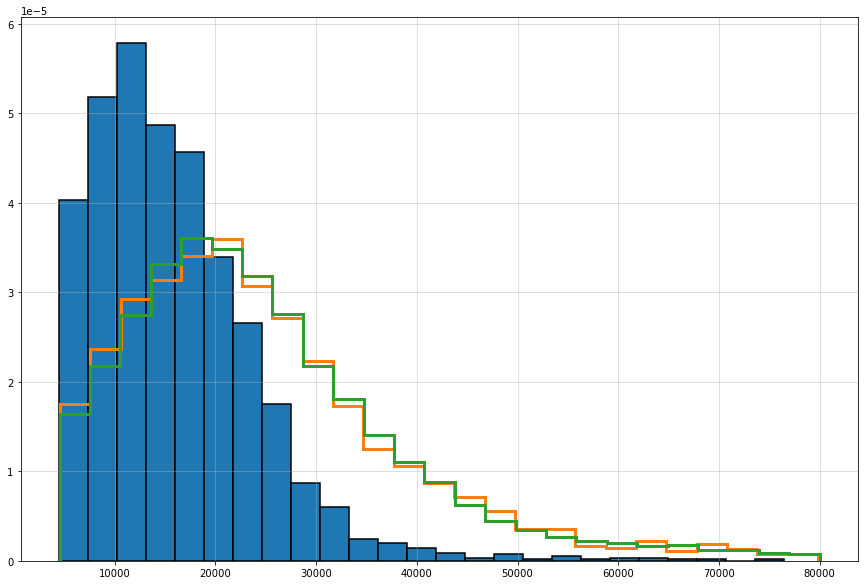

In [8]:
plt.figure(figsize = (15,10))
plt.grid(alpha = 0.5)
plt.hist(sm1, 25, edgecolor = 'black', linewidth = 1.5, density = True)
plt.hist(sm2, 25, histtype = 'step', linewidth = 3, density = True)
n=plt.hist(sm3, 25, histtype = 'step', linewidth = 3, density = True)

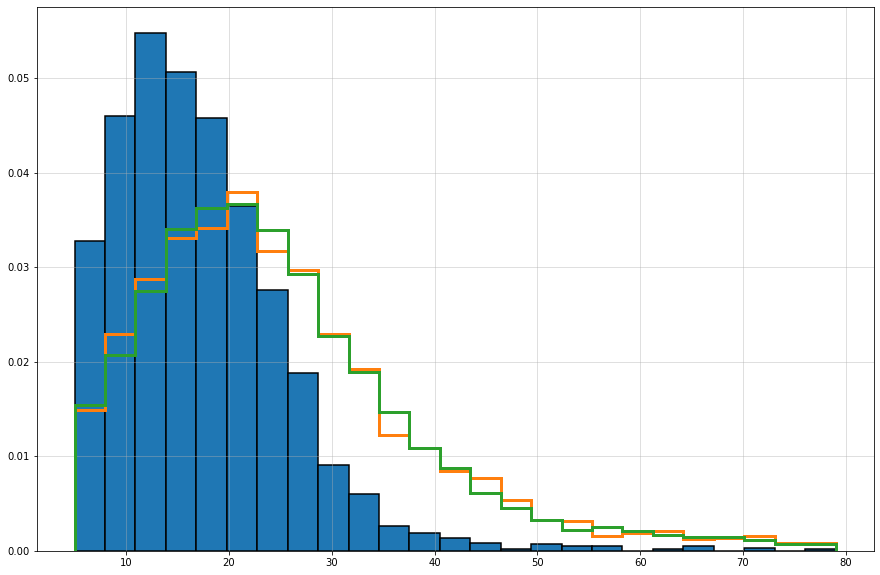

In [9]:
plt.figure(figsize = (15,10))
plt.grid(alpha = 0.5)
plt.hist(sz1, 25, edgecolor = 'black', linewidth = 1.5, density = True)
plt.hist(sz2, 25, histtype = 'step', linewidth = 3, density = True)
n=plt.hist(sz3, 25, histtype = 'step', linewidth = 3, density = True)

In [10]:
keep1 = []
keep2 = []
keep3 = []

for i in range(len(c1)):
    if c1['MCP5'].iloc[i] in list(df1['MCP5_picture']):
        keep1 += [True]
    else:
        keep1 += [False]
        
for i in range(len(c2)):
    if c2['MCP5'].iloc[i] in list(df2['MCP5_picture']):
        keep2 += [True]
    else:
        keep2 += [False]
        
for i in range(len(c3)):
    if c3['MCP5'].iloc[i] in list(df3['MCP5_picture']):
        keep3 += [True]
    else:
        keep3 += [False]
        
cs1 = [val for val,bal in zip(csize1,keep1) if bal == True]
cs2 = [val for val,bal in zip(csize2,keep2) if bal == True]
cs3 = [val for val,bal in zip(csize3,keep3) if bal == True]

av1 = [val for val,bal in zip(av1,keep1) if bal == True]
av2 = [val for val,bal in zip(av2,keep2) if bal == True]
av3 = [val for val,bal in zip(av3,keep3) if bal == True]

avsi1 = [val for val,bal in zip(avsi1,keep1) if bal == True]
avsi2 = [val for val,bal in zip(avsi2,keep2) if bal == True]
avsi3 = [val for val,bal in zip(avsi3,keep3) if bal == True]

df1.insert(0, 'clust_num', cs1)
df2.insert(0, 'clust_num', cs2)
df3.insert(0, 'clust_num', cs3)

df1.insert(0, 'av_csum', av1)
df2.insert(0, 'av_csum', av2)
df3.insert(0, 'av_csum', av3)

df1.insert(0, 'av_size', avsi1)
df2.insert(0, 'av_size', avsi2)
df3.insert(0, 'av_size', avsi3)

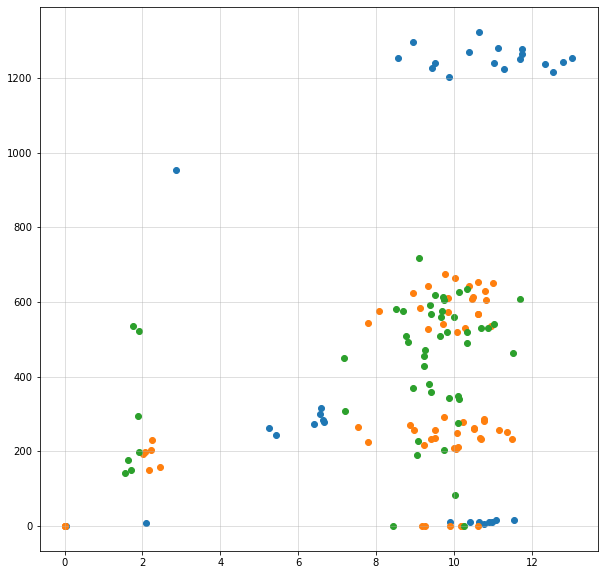

In [11]:
plt.figure(figsize = (10,10))
plt.grid(alpha = 0.5)
plt.scatter(df1.NE50_I, df1.clust_num)
plt.scatter(df2.NE50_I, df2.clust_num)
plt.scatter(df3.NE50_I, df3.clust_num)

In [12]:
pos1 = [val for bal in c1.pos for val in bal]
pos2 = [val for bal in c2.pos for val in bal]
pos3 = [val for bal in c3.pos for val in bal]

pos1r = [val for bal in c1r.pos for val in bal]
pos2r = [val for bal in c2r.pos for val in bal]
pos3r = [val for bal in c3r.pos for val in bal]

In [13]:
con3l = [val for val,bal in zip(c3.MCP5,c3.pos) if len(bal)>600]
pos3l = [val for bal,kal in zip(c3.MCP5,c3.pos) for val in kal if bal in con3l]

In [14]:
fl = [val for val in df[[True if 487 <= val <= 512 else False for val in df.run]]['MCP5_picture'] if val != 'None']

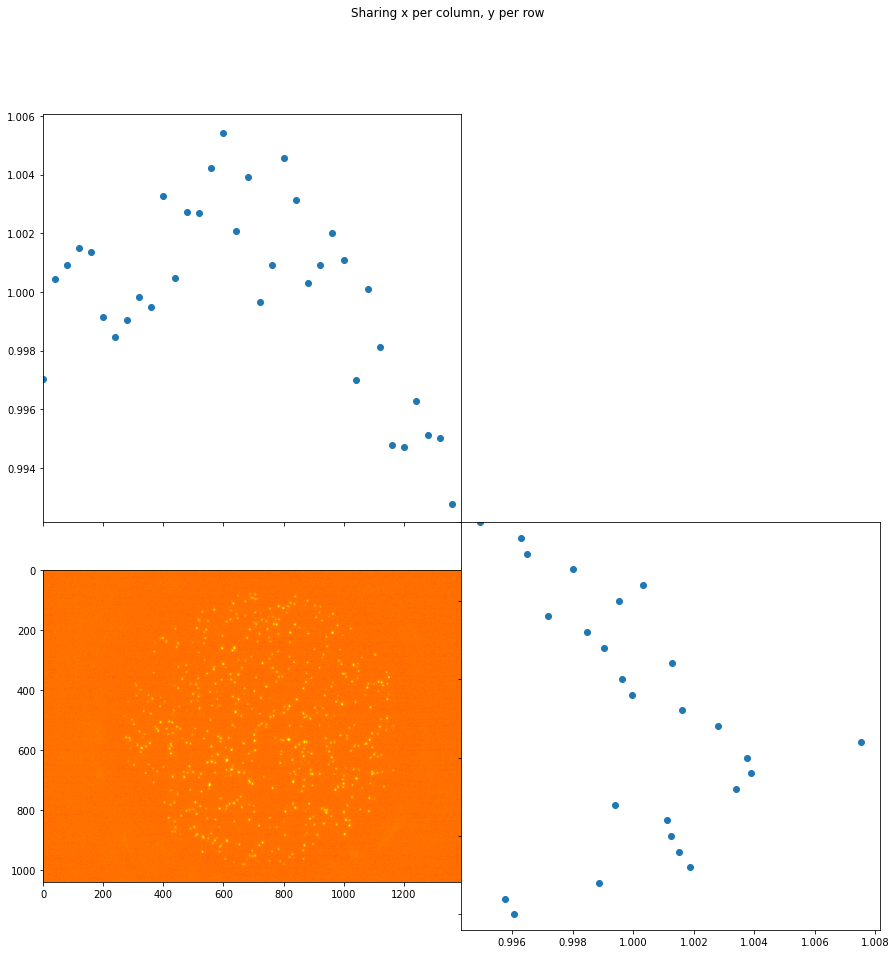

In [15]:
Im = Image.open(fl[0])
arr = np.array(Im)

av = np.average([val for bal in arr for val in bal])
arr = [[val/av for val in bal] for bal in arr]

fig = plt.figure(figsize = (15,15))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0).subplots(sharex='col', sharey='row')
ax0 = gs[1,0]
ax1 = gs[0,0]
ax2 = gs[1,1]
ax3 = gs[0,1]
ax3.axis('off')

#ax0.grid(alpha=0.5)
#ax1.grid(alpha=0.5)
#ax2.grid(alpha=0.5)

num = 40

x1 = np.linspace(0, len(arr[0])-1, len(arr[0]))[::num]
y1 = np.zeros(len(x1))
for i in range(len(y1)):
    y1[i] = np.average([val for bal in arr for val in bal[i*num:(i+1)*num]])

x2 = np.linspace(0, len(arr)-1, len(arr))[::num]
y2 = np.zeros(len(x2))
for i in range(len(y2)):
    y2[i] = np.average([val for bal in arr[i*num:(i+1)*num] for val in bal])

fig.suptitle('Sharing x per column, y per row')
ax0.imshow(arr, cmap = 'hot')
ax1.scatter(x1, y1)
ax2.scatter(y2,x2)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x + 1, -y, 'tab:green')
#ax4.plot(x + 2, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

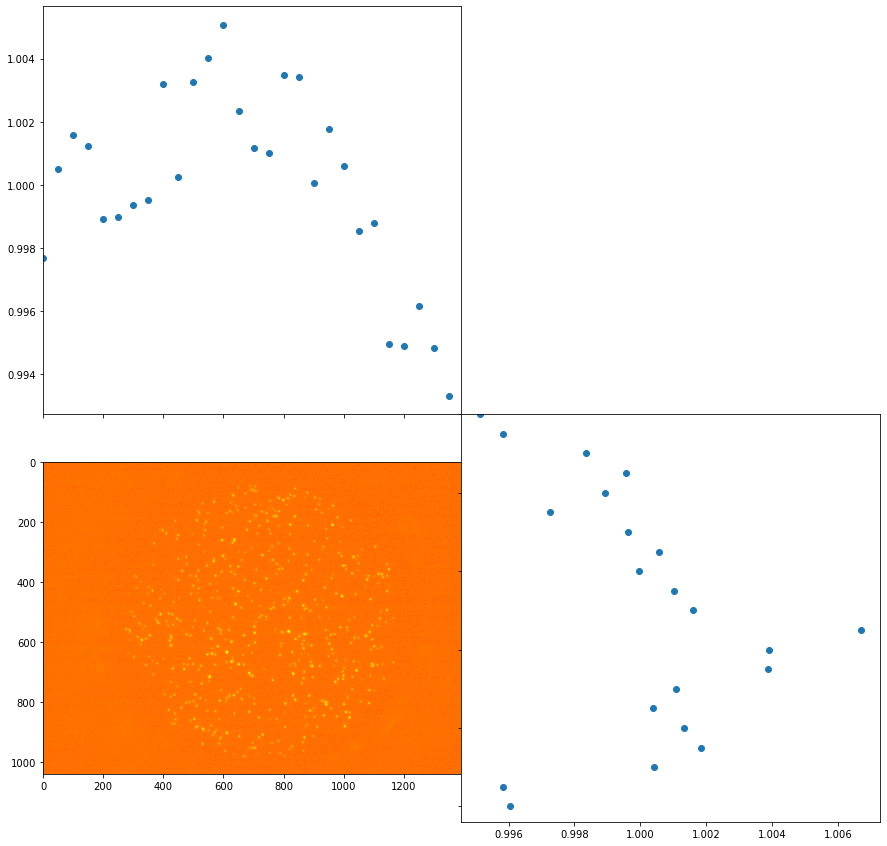

In [16]:
#arr = np.array([np.array([val*100 if val > 1 else val for val in bal]) for bal in arrb])

fig = plt.figure(figsize = (15,15))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0).subplots(sharex='col', sharey='row')
ax0 = gs[1,0]
ax1 = gs[0,0]
ax2 = gs[1,1]
ax3 = gs[0,1]
ax3.axis('off')

num = 50

x1 = np.linspace(0, len(arr[0])-1, len(arr[0]))[::num]
y1 = np.zeros(len(x1))
for i in range(len(y1)):
    y1[i] = np.average([val for bal in arr for val in bal[i*num:(i+1)*num]])

x2 = np.linspace(0, len(arr)-1, len(arr))[::num]
y2 = np.zeros(len(x2))
for i in range(len(y2)):
    y2[i] = np.average([val for bal in arr[i*num:(i+1)*num] for val in bal])

ax0.imshow(arr, cmap = 'hot')
ax1.scatter(x1, y1)
ax2.scatter(y2,x2)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x + 1, -y, 'tab:green')
#ax4.plot(x + 2, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

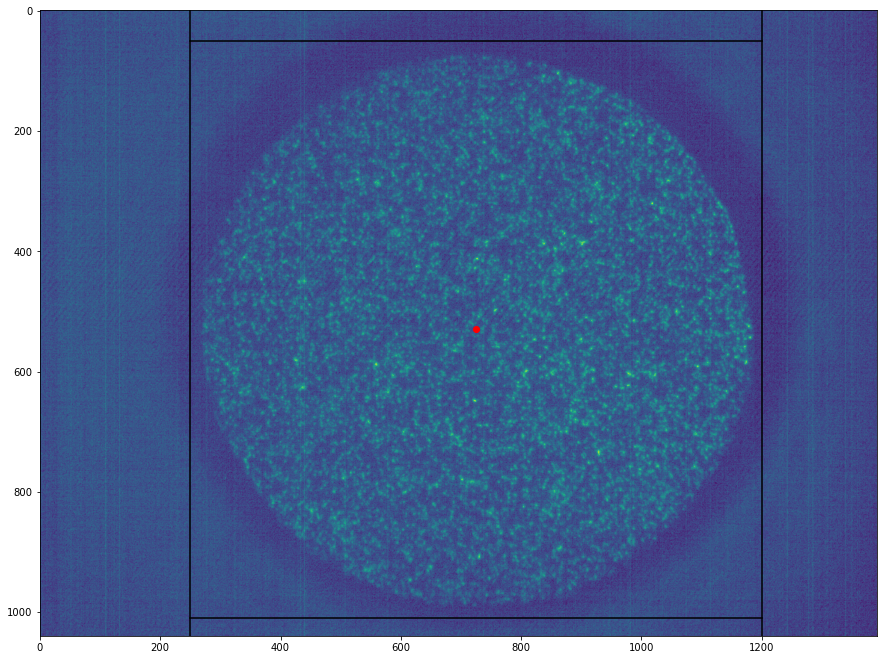

In [29]:
arr = arrb.copy()

fig = plt.figure(figsize = (15,15))
arr[arr<0.97] = 0.97
plt.imshow(arr)
arr[arr==0.97] = 0
plt.axvline(250, color = 'black')
plt.axvline(1200, color = 'black')
plt.plot([250,1200],[50,50], color = 'black')
plt.plot([250,1200],[1010,1010], color = 'black')
center = [475+250,480+50]
plt.scatter(center[0],center[1], color = 'red')

In [28]:
arrb = np.array([])

for i in list(df3r.MCP5_picture):
    Im = Image.open(i)
    temp = np.array(Im)
    tav = np.average([val for bal in temp for val in bal])
    #temp[temp < tav] = tav
    temp = np.array([np.array([(val/tav) for val in bal]) for bal in temp])
    if len(arrb) == 0: 
        arrb = temp
    else: 
        arrb += temp
        
arrb = np.array([[val/len(df3r) for val in bal] for bal in arrb])

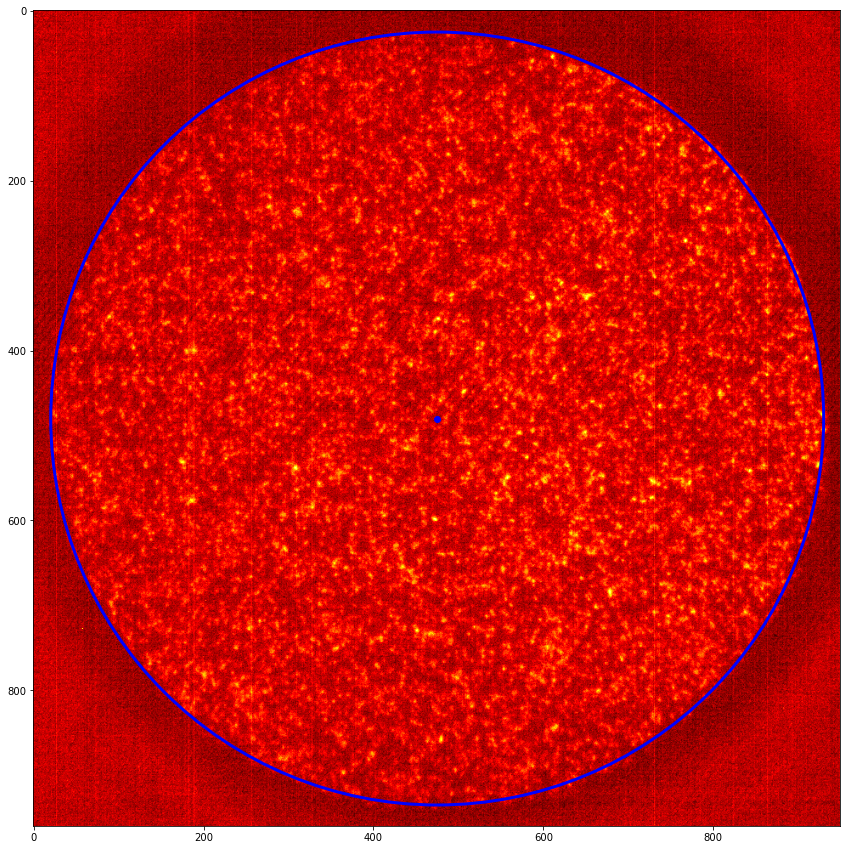

In [30]:
arrc = [[val for val in bal[250:1200]] for bal in arrb[50:1010]]

fig, ax = plt.subplots(figsize = (15,15))
ax.imshow(arrc, cmap = 'hot')

center = [0,0]
for i in range(len(arrc[0])):
    center[0] += i*sum([val[i] for val in arrc])
for i in range(len(arrc)):
    center[1] += i*sum(arrc[i])
center[0] = center[0]/(sum([val for bal in arrc for val in bal]))
center[1] = center[1]/(sum([val for bal in arrc for val in bal]))
center = [475,480] #center = [475+250,480+50]
ax.scatter(center[0],center[1], color = 'blue')

cir_rad = 455
cir = pat.Circle((475,480),cir_rad, color = 'blue', fill = False, linewidth = 3)
ax.add_patch(cir)

In [31]:
center = [725, 530]
arrd = arrb.copy()

for i in range(len(arrb[0])):
    for k in range(len(arrb)):
        if math.floor((((i-center[0])**2 + (k-center[1])**2)**0.5)) > cir_rad:
            arrd[k,i] = 0

[981.0]
[689.0]


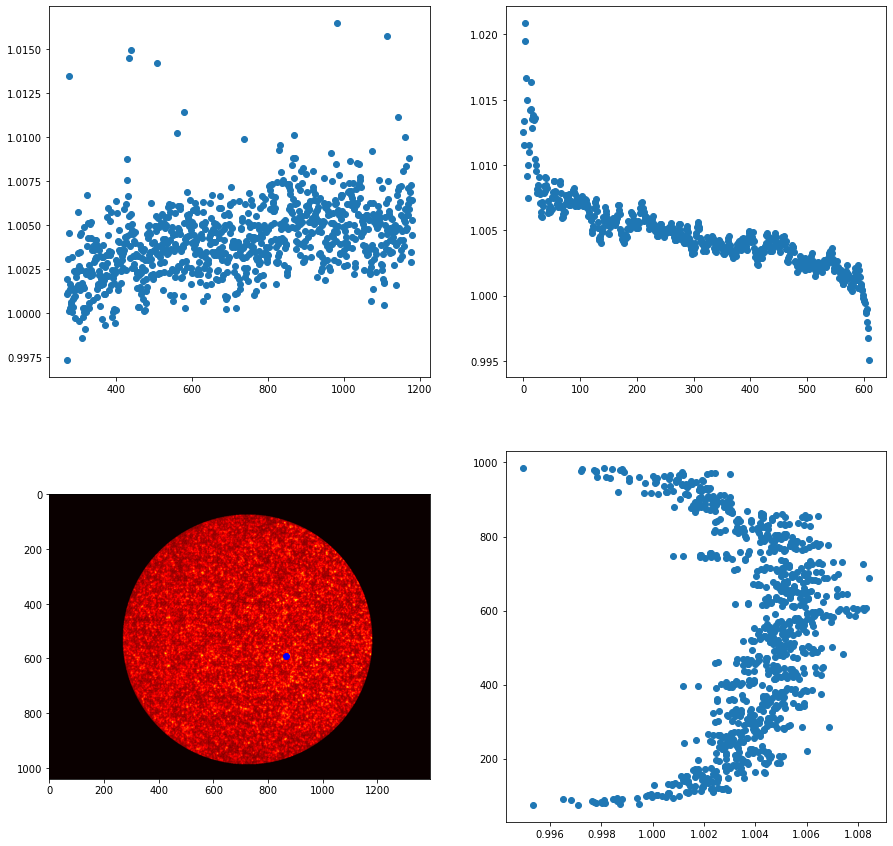

In [335]:
arr = arrd.copy()

fig = plt.figure(figsize = (15,15))
gs = fig.add_gridspec(2, 2)#, hspace=1, wspace=1)

ax0 = fig.add_subplot(gs[1,0])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[0,1])

num = 1

center = [725, 530]

beamsp = [867, 591]

x1 = np.linspace(0, len(arr[0])-1, len(arr[0]))[::num]
y1 = np.zeros(len(x1))
for i in range(len(y1)):
    temp_arr = [val for bal in arr for val in bal[i*num:(i+1)*num]]
    temp_nonz = len([1 for val in temp_arr if val > 0])
    if temp_nonz == 0: temp_nonz = 1
    y1[i] = sum(temp_arr)/temp_nonz

x2 = np.linspace(0, len(arr)-1, len(arr))[::num]
y2 = np.zeros(len(x2))
for i in range(len(y2)):
    temp_arr = [val for bal in arr[i*num:(i+1)*num] for val in bal]
    temp_nonz = len([1 for val in temp_arr if val > 0])
    if temp_nonz == 0: temp_nonz = 1
    y2[i] = sum(temp_arr)/temp_nonz
    
x3 = np.linspace(0, math.ceil(max(len(arr[0]),len(arr))/num)-1, math.ceil(max(len(arr[0]),len(arr))/num))
y3 = np.zeros(len(x3))
ly3 = np.zeros(len(x3))
for i in range(len(arr[0])):
    for k in range(len(arr)):
        if math.floor((((i-center[0])**2 + (k-center[1])**2)**0.5)) < cir_rad:
            temp_pos = math.floor((((i-beamsp[0])**2 + (k-beamsp[1])**2)**0.5)/num)
            y3[temp_pos] += arr[k,i]
            ly3[temp_pos] += 1

ly3 = [val if val > 0 else 1 for val in ly3]
y3 = [val/bal for val,bal in zip(y3,ly3)]

#y3 = [val/bal for val,bal in zip(y3[:math.ceil(cir_rad/num)],ly3[:math.ceil(cir_rad/num)])]
#x3 = x3[:math.ceil(cir_rad/num)]

x1 = [val for val,bal in zip(x1,y1) if bal>0]
y1 = [val for val in y1 if val>0]

x2 = [val for val,bal in zip(x2,y2) if bal>0]
y2 = [val for val in y2 if val>0]

x3 = [val for val,bal in zip(x3,y3) if bal>0]
y3 = [val for val in y3 if val>0]

arr[arr<0.97] = 0.97
ax0.imshow(arr, cmap = 'hot')
arr[arr==0.97] = 0
ax0.scatter(beamsp[0],beamsp[1], color = 'blue')
ax1.scatter(x1, y1)
ax2.scatter(y2,x2)
ax3.scatter([val*num for val in x3],y3)

print([val for val,bal in zip(x1,y1) if bal == max(y1)])
print([val for val,bal in zip(x2,y2) if bal == max(y2)])

In [308]:
y3[1], ly3[1]

(1.0080985839361087, 3768.0)

In [309]:
grid_sum, y3[1]*ly3[1]

(array([3798.51546427]), 3798.5154642712578)

In [304]:
np.linspace(867-20, 867+20, 1)

array([847.])

100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

3768


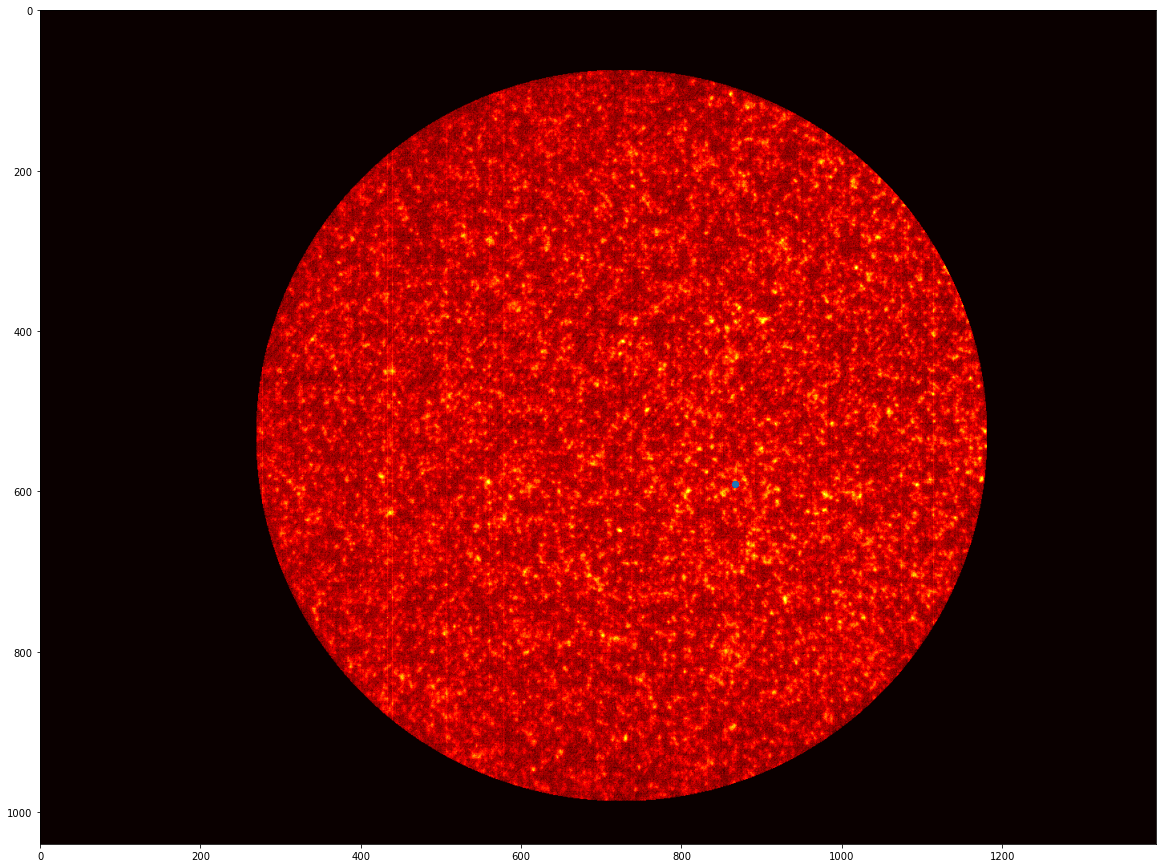

In [306]:
arr = arrd.copy()

fig = plt.figure(figsize = (20,20))

num = 20

center = [725, 530]

beamsp = [867, 591]

grid_num = 1

#gridx = np.linspace(867-20, 867+20, grid_num)
#gridy = np.linspace(591-20, 591+20, grid_num)
gridx = [867]
gridy = [591]

gridx = [val for bal in [[kal]*grid_num for kal in gridx] for val in bal]
gridy = list(gridy)*grid_num
grid_sum = np.zeros(len(gridx))
grid_sum_n = np.zeros(len(gridx))

for o in tqdm(range(len(gridx))):
    temp_arr = arr.copy()
    temp_num = 0
    for i in range(len(temp_arr[0])):
        for k in range(len(temp_arr)):
            temp_pos = math.floor((((i-gridx[o])**2 + (k-gridy[o])**2)**0.5))
            if temp_pos >= num:
                temp_arr[k,i] = 0
    temp_num = len([1 for bal in temp_arr for val in bal if val > 0])
    grid_sum[o] = sum(sum(temp_arr))
    grid_sum_n[o] = 0 if temp_num == 0 else sum(sum(temp_arr))/temp_num
    print(temp_num)
    
#x3 = np.linspace(0, math.ceil(max(len(arr[0]),len(arr))/num)-1, math.ceil(max(len(arr[0]),len(arr))/num))
#y3 = np.zeros(len(x3))
#ly3 = np.zeros(len(x3))
#for i in range(len(arr[0])):
#    for k in range(len(arr)):
#        if math.floor((((i-center[0])**2 + (k-center[1])**2)**0.5)) < cir_rad:
#            temp_pos = math.floor((((i-beamsp[0])**2 + (k-beamsp[1])**2)**0.5)/num)
#            y3[temp_pos] += arr[k][i]
#            ly3[temp_pos] += 1

arr[arr<0.97] = 0.97
plt.imshow(arr, cmap = 'hot')
plt.scatter(beamsp[0], beamsp[1], color = 'blue')
plt.scatter(gridx, gridy)
arr[arr==0.97] = 0

In [277]:
gsum_ps = grid_sum
gsum_psn = grid_sum_n

In [294]:
gridx[np.argmax(gsum_psn)], gridy[np.argmax(gsum_psn)]

(857.0, 601.0)

(1.006, 1.015)

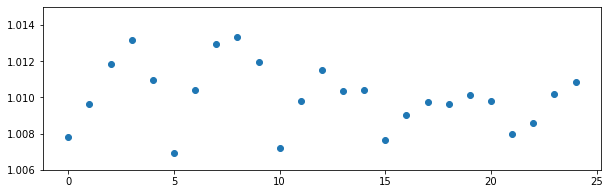

In [301]:
plt.figure(figsize = (10,3))
xl = np.linspace(0,len(gsum_psn)-1,len(gsum_psn))
#plt.scatter(xl,[val/max(gsum_s) for val in gsum_s])
plt.scatter(xl,[val for val in gsum_psn])
plt.ylim(1.006,1.015)

In [115]:
def gaussfunc(x,s):
    return 1/(s*(2*np.pi)**0.5) * np.exp(-1/2 * x**2/s**2)

def gaussmat(s):
    xl = np.linspace(-3*s, 3*s, 6*s+1)
    gauss_arr = [gaussfunc(val,s) for val in xl]
    res = [[val*bal for val in gauss_arr] for bal in gauss_arr]
    return res

In [117]:
carr = np.array([])

for i in list(df3r.MCP5_picture):
    Im = Image.open(i)
    temp = np.array(Im)
    tav = np.average([val for bal in temp for val in bal])
    #temp[temp < tav] = tav
    temp = np.array([np.array([(val/tav) for val in bal]) for bal in temp])
    if len(carr) == 0: 
        carr = temp
    else: 
        carr += temp
        
carr = np.array([[val/len(df3r) for val in bal] for bal in carr])

In [128]:
s = 10

start_time = time()
carrg = sgi.convolve2d(carr, gaussmat(s), mode = 'same')
print(time()-start_time)

13.885821342468262


In [129]:
len(carr), len(carrg), len(carr[0]), len(carrg[0])

(1040, 1040, 1392, 1392)

In [132]:
len([1 for bal in carrg[100:940] for val in bal[100:1292] if val < 0.99])

108927

In [134]:
center = [725, 530]

for i in range(len(carrg[0])):
    for k in range(len(carrg)):
        if math.floor((((i-center[0])**2 + (k-center[1])**2)**0.5)) > cir_rad:
            carrg[k,i] = 0

100%|██████████| 25/25 [00:51<00:00,  2.04s/it]


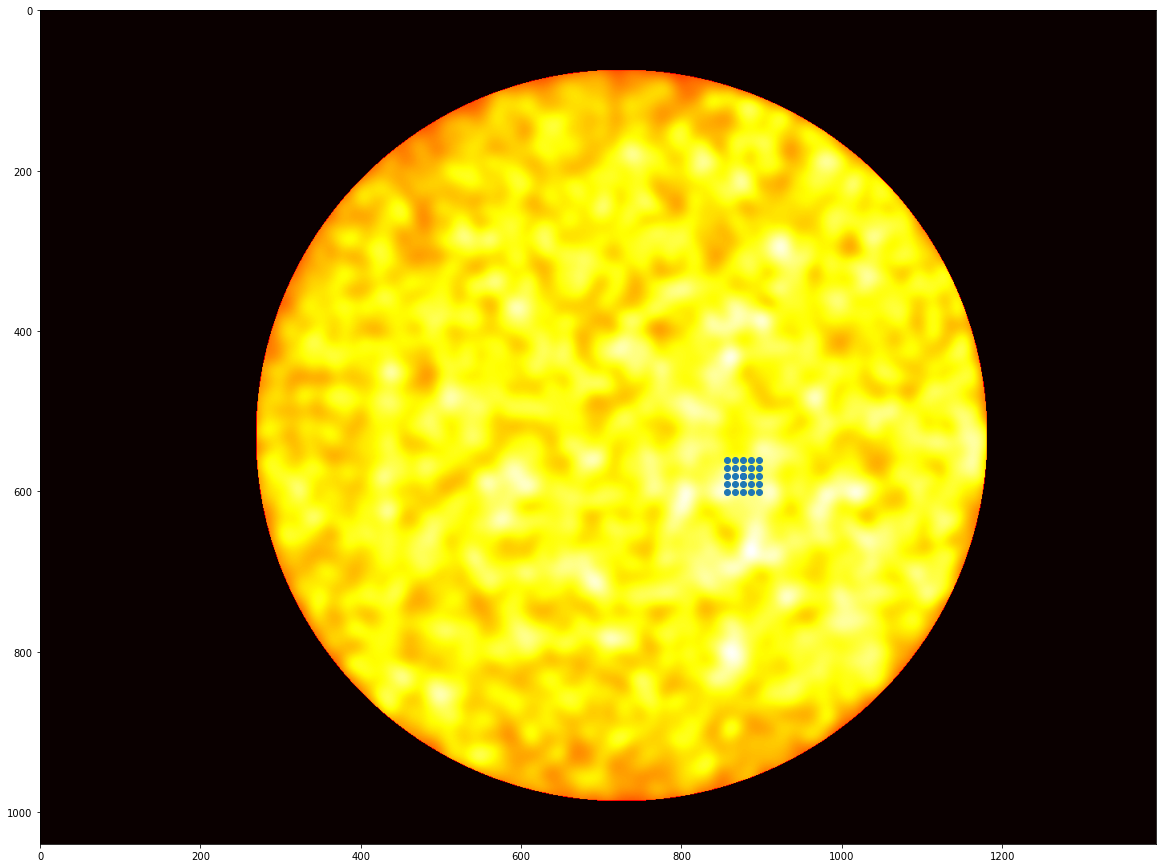

In [322]:
arr = carrg.copy()

fig = plt.figure(figsize = (20,20))

num = 100

center = [725, 530]

beamsp = [867, 601]

grid_num = 5

gridx = np.linspace(beamsp[0]-20, beamsp[0]+20, grid_num)
gridy = np.linspace(beamsp[1]-20, beamsp[1]+20, grid_num)
#gridx = [867]
#gridy = [591]

gridx = [val for bal in [[kal]*grid_num for kal in gridx] for val in bal]
gridy = list(gridy)*grid_num
grid_sum = np.zeros(len(gridx))
grid_sum_n = np.zeros(len(gridx))

for o in tqdm(range(len(gridx))):
    temp_arr = arr.copy()
    temp_num = 0
    for i in range(len(temp_arr[0])):
        for k in range(len(temp_arr)):
            temp_pos = math.floor((((i-gridx[o])**2 + (k-gridy[o])**2)**0.5))
            if temp_pos >= num:
                temp_arr[k,i] = 0
    temp_num = len([1 for bal in temp_arr for val in bal if val > 0])
    grid_sum[o] = sum(sum(temp_arr))
    grid_sum_n[o] = 0 if temp_num == 0 else sum(sum(temp_arr))/temp_num

arr[arr<0.97] = 0.97
plt.imshow(arr, cmap = 'hot')
plt.scatter(beamsp[0], beamsp[1], color = 'blue')
plt.scatter(gridx, gridy)
arr[arr==0.97] = 0

In [324]:
gsum_gp = grid_sum
gsum_gpn = grid_sum_n
gridx[np.argmax(gsum_gp)], gridy[np.argmax(gsum_gpn)]

(867.0, 601.0)

In [318]:
gridx[11]-gridx[0]

101.11111111111109

In [ ]:
plt.figure(figsize = (10,3))
xl = np.linspace(0,len(gsum_psn)-1,len(gsum_psn))
#plt.scatter(xl,[val/max(gsum_s) for val in gsum_s])
plt.scatter(xl,[val for val in gsum_psn])
plt.ylim(1.006,1.015)

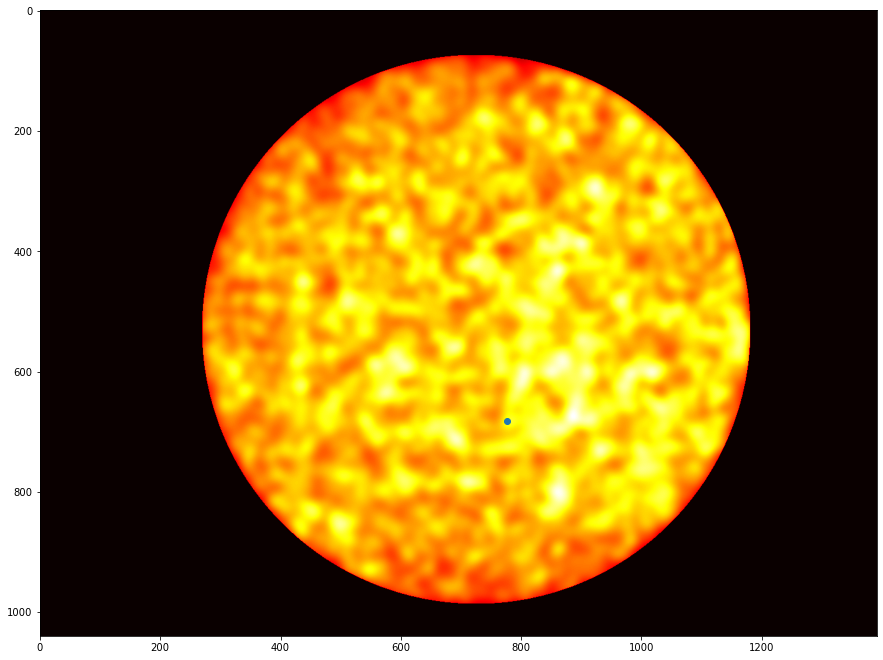

In [316]:
carrc = carrg.copy()

fig = plt.figure(figsize = (15,15))
carrc[carrc<0.98] = 0.98
plt.imshow(carrc, cmap = 'hot')
carrc[carrc==0.98] = 0
plt.scatter(776, 682)

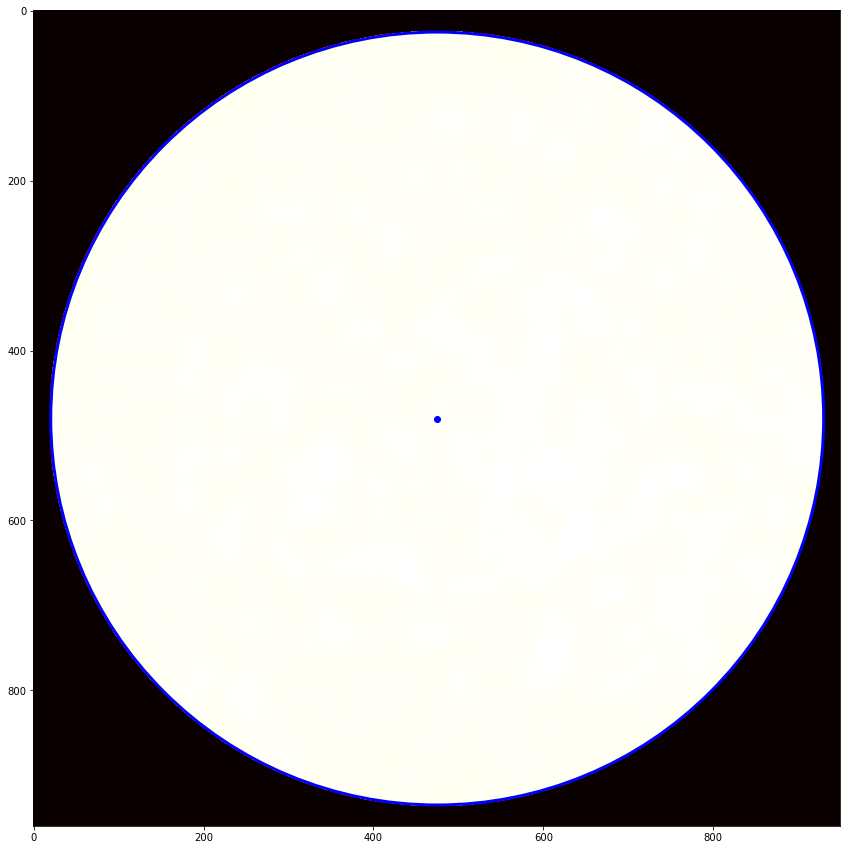

In [332]:
arrc = [[val for val in bal[250:1200]] for bal in carrg[50:1010]]

fig, ax = plt.subplots(figsize = (15,15))
ax.imshow(arrc, cmap = 'hot')

center = [0,0]
for i in range(len(arrc[0])):
    center[0] += i*sum([val[i] for val in arrc])
for i in range(len(arrc)):
    center[1] += i*sum(arrc[i])
center[0] = center[0]/(sum([val for bal in arrc for val in bal]))
center[1] = center[1]/(sum([val for bal in arrc for val in bal]))
center = [475,480] #center = [475+250,480+50]
ax.scatter(center[0],center[1], color = 'blue')

cir_rad = 455
cir = pat.Circle((475,480),cir_rad, color = 'blue', fill = False, linewidth = 3)
ax.add_patch(cir)

[865.0]
[598.0]


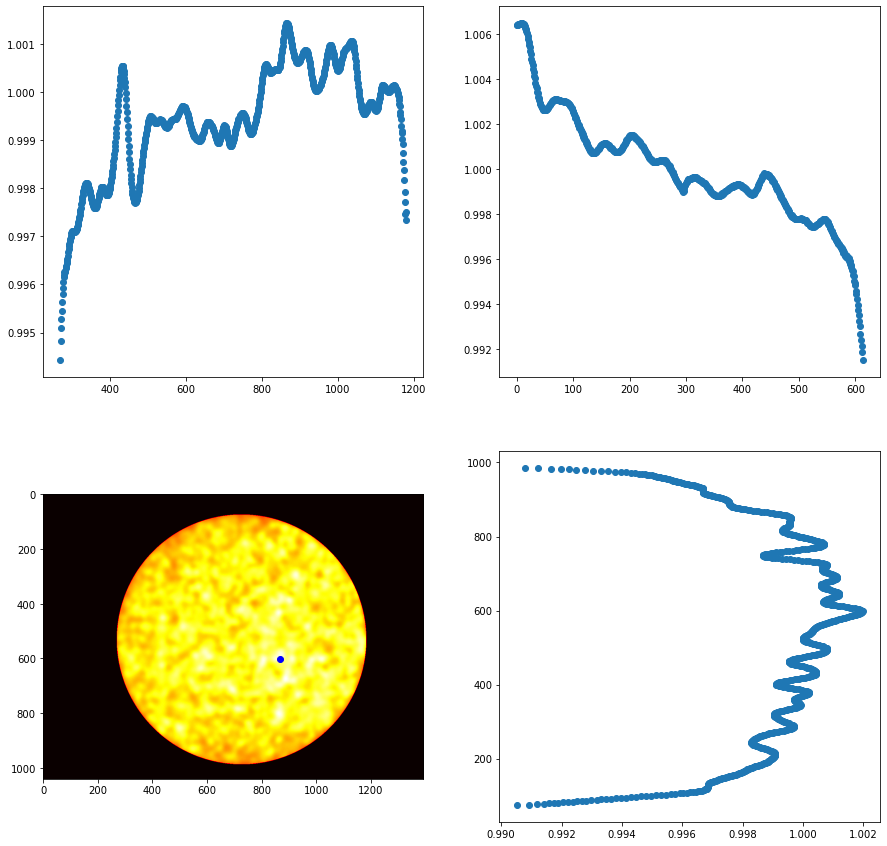

In [377]:
arr = carrg.copy()

fig = plt.figure(figsize = (15,15))
gs = fig.add_gridspec(2, 2)#, hspace=1, wspace=1)

ax0 = fig.add_subplot(gs[1,0])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[0,1])

num = 1

center = [725, 530]

beamsp = [867, 601]

x1 = np.linspace(0, len(arr[0])-1, len(arr[0]))[::num]
y1 = np.zeros(len(x1))
for i in range(len(y1)):
    temp_arr = [val for bal in arr for val in bal[i*num:(i+1)*num]]
    temp_nonz = len([1 for val in temp_arr if val > 0])
    if temp_nonz == 0: temp_nonz = 1
    y1[i] = sum(temp_arr)/temp_nonz

x2 = np.linspace(0, len(arr)-1, len(arr))[::num]
y2 = np.zeros(len(x2))
for i in range(len(y2)):
    temp_arr = [val for bal in arr[i*num:(i+1)*num] for val in bal]
    temp_nonz = len([1 for val in temp_arr if val > 0])
    if temp_nonz == 0: temp_nonz = 1
    y2[i] = sum(temp_arr)/temp_nonz
    
x3 = np.linspace(0, math.ceil(max(len(arr[0]),len(arr))/num)-1, math.ceil(max(len(arr[0]),len(arr))/num))
y3 = np.zeros(len(x3))
ly3 = np.zeros(len(x3))
for i in range(len(arr[0])):
    for k in range(len(arr)):
        if math.floor((((i-center[0])**2 + (k-center[1])**2)**0.5)) < cir_rad:
            temp_pos = math.floor((((i-beamsp[0])**2 + (k-beamsp[1])**2)**0.5)/num)
            y3[temp_pos] += arr[k][i]
            ly3[temp_pos] += 1

ly3 = [val if val > 0 else 1 for val in ly3]
y3 = [val/bal for val,bal in zip(y3,ly3)]

#y3 = [val/bal for val,bal in zip(y3[:math.ceil(cir_rad/num)],ly3[:math.ceil(cir_rad/num)])]
#x3 = x3[:math.ceil(cir_rad/num)]

x1 = [val for val,bal in zip(x1,y1) if bal>0]
y1 = [val for val in y1 if val>0]

x2 = [val for val,bal in zip(x2,y2) if bal>0]
y2 = [val for val in y2 if val>0]

x3 = [val for val,bal in zip(x3,y3) if bal>0]
y3 = [val for val in y3 if val>0]

arr[arr<0.97] = 0.97
ax0.imshow(arr, cmap = 'hot')
arr[arr==0.97] = 0
ax0.scatter(beamsp[0],beamsp[1], color = 'blue')
ax1.scatter(x1, y1)
ax2.scatter(y2,x2)
ax3.scatter([val*num for val in x3],y3)

print([val for val,bal in zip(x1,y1) if bal == max(y1)])
print([val for val,bal in zip(x2,y2) if bal == max(y2)])

In [369]:
def gaussfuncb(x,a,c):
    return a*np.exp(-(x)**2/(2*c**2))

In [400]:
d_pix = cir_rad*2
d_cm = 4
xd3 =[(val/d_pix)*4 for val in x3]

args,cov = soi.curve_fit(gaussfuncb, xd3[:-25], y3[:-25], maxfev = 1000, p0 = [1.002, 600])

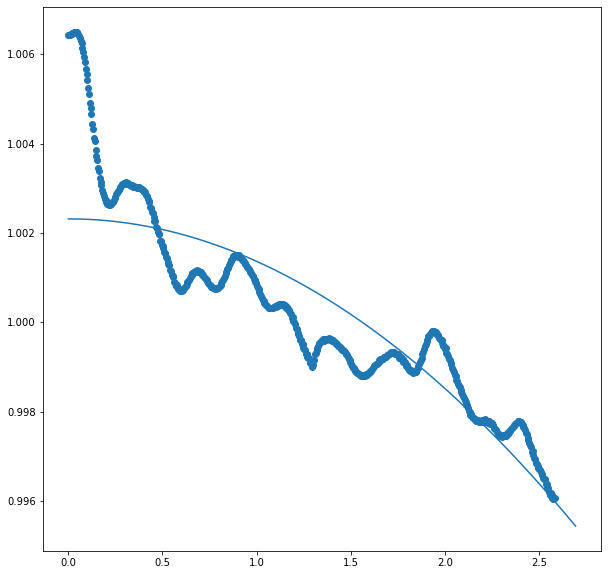

In [387]:
plt.figure(figsize = (10,10))
plt.scatter(xd3[:-25],y3[:-25])
#plt.plot(x3,[gaussfuncb(val,1.002,6000) for val in x3])
plt.plot(xd3,[gaussfuncb(val,args[0],args[1]) for val in xd3])

0.06945548118602358
0.06861577219983368
0.07031602350704129


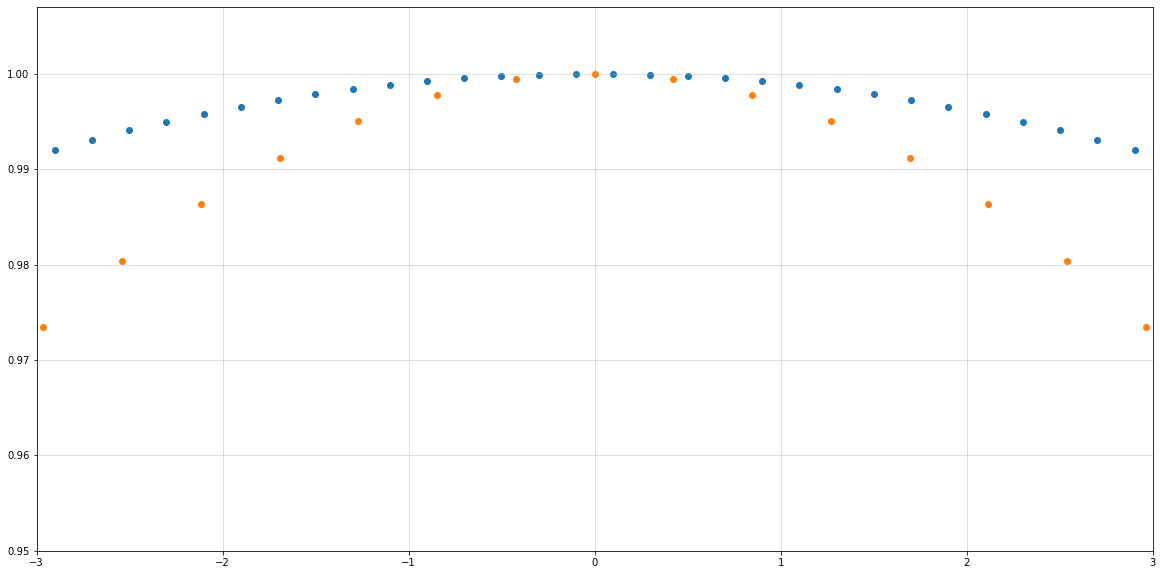

In [410]:
xl =np.linspace(-100,100,1000)
yl = [gaussfuncb(val,args[0],args[1]) for val in xl]
yl = [val/max(yl) for val in yl]
yl_min = [gaussfuncb(val,args[0]-(cov[0,0])**0.5,args[1]-(cov[1,1])**0.5) for val in xl]
yl_max = [gaussfuncb(val,args[0]+(cov[0,0])**0.5,args[1]+(cov[1,1])**0.5) for val in xl]

y_test = [9.829069624951472e-05,0.00010015301167313425,0.0001020602317314089,0.00010401410954004278,0.00010601644888178108,0.00010806910035342628,0.00011017395757921827,0.00011233295357028958,0.00011454805730130723,0.00011682127056349153,0.00011915462513853865,0.00012155018032149226,0.00012401002080353904,0.00012653625490927892,0.00012913101316865962,0.0001317964471926798,0.00013453472881530575,0.00013734804946250283,0.00014023861971324496,0.00014320866902671364,0.00014626044562408977,0.00014939621653149233,0.00015261826781135698,0.00015592890503157817,0.00015933045404340322,0.00016282526215890105,0.00016641569983547521,0.00017010416298710837,0.00017389307604902406,0.0001777848959236157,0.00018178211693074006,0.0001858872768749803,0.00019010296432688315,0.00019443182719531686,0.00019887658264510551,0.0002034400283891224,0.00020812505535817727,0.00021293466172644547,0.0002178719682453715,0.00022294023481589644,0.00022814287820729153,0.00023348349081141784,0.00023896586030345697,0.00024459399006421045,0.00025037212020465115,0.00025630474902059295,0.0002623966546940777,0.00026865291704851214,0.00027507893915702493,0.00028168046859838007,0.0002884636181526522,0.0002954348857304304,0.00030260117333533437,0.00030996980487073137,0.00031754854261840595,0.0003253456022396749,0.00033336966617814577,0.00034162989537730846,0.00035013593926461374,0.0003588979439951458,0.0003679265589908711,0.00037723294185385643,0.0003868287617719853,0.0003967262015717919,0.00040693795860369,0.00041747724466887693,0.00042835778521400214,0.00043959381802906544,0.0004512000916863479,0.00046319186395439756,0.0004755849004126133,0.0004883954734805311,0.0005016403620638229,0.0005153368520082774,0.0005295027375460858,0.0005441563239172618,0.0005593164313546447,0.0005750024006344704,0.0005912341004161205,0.0006080319366240575,0.0006254168641608626,0.0006434104012812918,0.0006620346470010536,0.0006813123019582296,0.0007012666931873717,0.0007219218033033087,0.0007433023046210531,0.0007654335987572593,0.0007883418622651112,0.0008120540988465249,0.0008365981986616345,0.0008620030052148711,0.0008882983902391688,0.000915515336925064,0.000943686031750177,0.000972843965057716,0.0010030240404112609,0.0010342626926186978,0.0010665980141725793,0.001100069889699417,0.0011347201378493067,0.0011705926598928706,0.0012077335941283736,0.001246191475042349,0.0012860173960162916,0.0013272651742348854,0.00136999151633231,0.0014142561832170735,0.0014601221524469063,0.00150765577648716,0.0015569269351822913,0.0016080091808024478,0.0016609798740972045,0.0017159203098959508,0.0017729158309374906,0.0018320559287870652,0.0018934343309019175,0.0019571490731305563,0.002023302557168244,0.0020920015927330844,0.002163357424464574,0.0022374857437698274,0.002314506686043013,0.0023945448138521564,0.0024777290868165784,0.0025641928189812395,0.0026540736245258623,0.0027475133526227366,0.002844658012175416,0.0029456576870297182,0.0030506664420492636,0.0031598422201916487,0.003273346730410497,0.0033913453258471,0.003514006871365957,0.0036415035990364194,0.0037740109496718684,0.003911707398013753,0.004054774258595888,0.00420339546875115,0.004357757344635126,0.004518048305547668,0.004684458561242674,0.004857179756338989,0.00503640456539222,0.005222326231670929,0.005415138042214031,0.0056150327313444345,0.005822201804491472,0.006036834773948579,0.006259118298079117,0.006489235215499245,0.006727363465928862,0.006973674889725151,0.007228333898613446,0.007491496010820033,0.007763306244703772,0.008043897366090189,0.008333387985844118,0.008631880505786898,0.008939458912883358,0.009256186423703598,0.009582102983517507,0.009917222627014721,0.01026153071056912,0.010614981029187787,0.010977492834799717,0.011348947776340929,0.01172918678616255,0.01211800694159775,0.012515158335029183,0.012920340990440052,0.013333201869130236,0.013753332011932805,0.01418026386975177,0.014613468878410633,0.01505235533748149,0.015496266655762592,0.0159444800281757,0.016396205609838625,0.016850586252702797,0.017306697868204383,0.017763550475652826,0.01822008999039593,0.018675200798026922,0.019127709150974323,0.019576387411758985,0.020019959153132403,0.020457105109454882,0.020886469956377492,0.021306669877622288,0.021716300858986137,0.022113947631291483,0.022498193166606124,0.0228676286164131,0.02322086356727138,0.023556536479537288,0.023873325168454376,0.02416995718472376,0.024445219953667933,0.024697970538170314,0.024927144900314314,0.02513176654941231,0.02531095447904778,0.025463930311861505,0.02559002458704945,0.025688682140923635,0.025759466544591568,0.025802063574261482,0.025816283698622135,0.025802063574261482,0.025759466544591568,0.025688682140923635,0.02559002458704945,0.025463930311861505,0.02531095447904778,0.02513176654941231,0.024927144900314314,0.024697970538170314,0.024445219953667933,0.02416995718472376,0.023873325168454376,0.023556536479537288,0.02322086356727138,0.0228676286164131,0.022498193166606124,0.022113947631291483,0.021716300858986137,0.021306669877622288,0.020886469956377492,0.020457105109454882,0.020019959153132403,0.019576387411758985,0.019127709150974323,0.018675200798026922,0.01822008999039593,0.017763550475652826,0.017306697868204383,0.016850586252702797,0.016396205609838625,0.0159444800281757,0.015496266655762592,0.01505235533748149,0.014613468878410633,0.01418026386975177,0.013753332011932805,0.013333201869130236,0.012920340990440052,0.012515158335029183,0.01211800694159775,0.01172918678616255,0.011348947776340929,0.010977492834799717,0.010614981029187787,0.01026153071056912,0.009917222627014721,0.009582102983517507,0.009256186423703598,0.008939458912883358,0.008631880505786898,0.008333387985844118,0.008043897366090189,0.007763306244703772,0.007491496010820033,0.007228333898613446,0.006973674889725151,0.006727363465928862,0.006489235215499245,0.006259118298079117,0.006036834773948579,0.005822201804491472,0.0056150327313444345,0.005415138042214031,0.005222326231670929,0.00503640456539222,0.004857179756338989,0.004684458561242674,0.004518048305547668,0.004357757344635126,0.00420339546875115,0.004054774258595888,0.003911707398013753,0.0037740109496718684,0.0036415035990364194,0.003514006871365957,0.0033913453258471,0.003273346730410497,0.0031598422201916487,0.0030506664420492636,0.0029456576870297182,0.002844658012175416,0.0027475133526227366,0.0026540736245258623,0.0025641928189812395,0.0024777290868165784,0.0023945448138521564,0.002314506686043013,0.0022374857437698274,0.002163357424464574,0.0020920015927330844,0.002023302557168244,0.0019571490731305563,0.0018934343309019175,0.0018320559287870652,0.0017729158309374906,0.0017159203098959508,0.0016609798740972045,0.0016080091808024478,0.0015569269351822913,0.00150765577648716,0.0014601221524469063,0.0014142561832170735,0.00136999151633231,0.0013272651742348854,0.0012860173960162916,0.001246191475042349,0.0012077335941283736,0.0011705926598928706,0.0011347201378493067,0.001100069889699417,0.0010665980141725793,0.0010342626926186978,0.0010030240404112609,0.000972843965057716,0.000943686031750177,0.000915515336925064,0.0008882983902391688,0.0008620030052148711,0.0008365981986616345,0.0008120540988465249,0.0007883418622651112,0.0007654335987572593,0.0007433023046210531,0.0007219218033033087,0.0007012666931873717,0.0006813123019582296,0.0006620346470010536,0.0006434104012812918,0.0006254168641608626,0.0006080319366240575,0.0005912341004161205,0.0005750024006344704,0.0005593164313546447,0.0005441563239172618,0.0005295027375460858,0.0005153368520082774,0.0005016403620638229,0.0004883954734805311,0.0004755849004126133,0.00046319186395439756,0.0004512000916863479,0.00043959381802906544,0.00042835778521400214,0.00041747724466887693,0.00040693795860369,0.0003967262015717919,0.0003868287617719853,0.00037723294185385643,0.0003679265589908711,0.0003588979439951458,0.00035013593926461374,0.00034162989537730846,0.00033336966617814577,0.0003253456022396749,0.00031754854261840595,0.00030996980487073137,0.00030260117333533437,0.0002954348857304304,0.0002884636181526522,0.00028168046859838007,0.00027507893915702493,0.00026865291704851214,0.0002623966546940777,0.00025630474902059295,0.00025037212020465115,0.00024459399006421045,0.00023896586030345697,0.00023348349081141784,0.00022814287820729153,0.00022294023481589644,0.0002178719682453715,0.00021293466172644547,0.00020812505535817727,0.0002034400283891224,0.00019887658264510551,0.00019443182719531686,0.00019010296432688315,0.0001858872768749803,0.00018178211693074006,0.0001777848959236157,0.00017389307604902406,0.00017010416298710837,0.00016641569983547521,0.00016282526215890105,0.00015933045404340322,0.00015592890503157817,0.00015261826781135698,0.00014939621653149233,0.00014626044562408977,0.00014320866902671364,0.00014023861971324496,0.00013734804946250283,0.00013453472881530575,0.0001317964471926798,0.00012913101316865962,0.00012653625490927892,0.00012401002080353904,0.00012155018032149226,0.00011915462513853865,0.00011682127056349153,0.00011454805730130723,0.00011233295357028958,0.00011017395757921827,0.00010806910035342628,0.00010601644888178108,0.00010401410954004278,0.0001020602317314089,0.00010015301167313425,9.829069624951472e-05]
x_test = [-97.57219549304673,-97.00849168294015,-96.4464068218278,-95.88592691992156,-95.32703810739021,-94.76972663287063,-94.21397886199941,-93.65978127596449,-93.10712047007695,-92.55598315236219,-92.00635614217026,-91.45822636880527,-90.91158087017318,-90.36640679144801,-89.82269138375607,-89.28042200287763,-88.73958610796629,-88.20017126028522,-87.6621651219604,-87.12555545475024,-86.59033011883167,-86.05647707160206,-85.52398436649709,-84.99284015182405,-84.46303266961024,-83.93455025446671,-83.40738133246646,-82.88151442003726,-82.35693812286897,-81.83364113483456,-81.31161223692528,-80.7908402961993,-80.2713142647438,-79.75302317865024,-79.23595615700268,-78.72010240087873,-78.2054511923632,-77.69199189357411,-77.17971394570084,-76.6686068680542,-76.15866025712849,-75.64986378567501,-75.1422072017871,-74.63568032799634,-74.13027306037985,-73.62597536767856,-73.12277729042614,-72.62066894008856,-72.11964049821393,-71.61968221559273,-71.120784411428,-70.62293747251552,-70.12613185243369,-69.63035807074313,-69.13560671219568,-68.6418684259527,-68.14913392481255,-67.65739398444722,-67.16663944264778,-66.6768611985784,-66.18805021203939,-65.7001975027384,-65.21329414957015,-64.72733128990428,-64.24230011888145,-63.758191888717306,-63.274997908014264,-62.79270954108127,-62.31131820726089,-61.83081538026408,-61.35119258751236,-60.872441409487095,-60.394553479086156,-59.91752048098749,-59.44133415101972,-58.96598627553949,-58.49146869081573,-58.01777328242025,-57.54489198462531,-57.07281677980711,-56.60153969785608,-56.13105281559312,-55.66134825619205,-55.192418188608166,-54.72425482701276,-54.256850430233435,-53.79019730120016,-53.32428778639722,-52.8591142753205,-52.39466919994058,-51.9309450341709,-51.46793429334165,-51.00562953367867,-50.54402335178764,-50.08310838414333,-49.622877306583966,-49.16332283381042,-48.70443771889034,-48.24621475276716,-47.788646763773656,-47.33172661715032,-46.875447214568176,-46.419801493656266,-45.964782427533414,-45.51038302434448,-45.056596326800786,-44.603415411724995,-44.15083338959987,-43.698843404121384,-43.24743863175575,-42.79661228130044,-42.346357593449085,-41.89666784036038,-41.44753632523052,-40.998956381869625,-40.55092137428164,-40.10342469624795,-39.65645977091455,-39.21002005038262,-38.76409901530264,-38.31869017447187,-37.87378706443508,-37.42938324908864,-36.985472319287794,-36.54204789245716,-36.099103612204175,-35.65663314793584,-35.2146301944783,-34.77308847169941,-34.332001724134344,-33.891363720613874,-33.45116825389556,-33.0114091402978,-32.57208021933635,-32.13317535336379,-31.694688427211403,-31.256613347833756,-30.81894404395578,-30.381674465722277,-29.94479858435,-29.508310391782004,-29.072203900344395,-28.63647314240546,-28.201112170036954,-27.766115054677694,-27.33147588679929,-26.897188775574087,-26.463247848545137,-26.02964725129829,-25.596381147136242,-25.16344371675468,-24.73082915792025,-24.298531685150493,-23.866545529395637,-23.43486493772225,-23.00348417299864,-22.572397513581976,-22.141599253007254,-21.711083699677822,-21.280845176557577,-20.850878020864805,-20.421176583767565,-19.991735230080597,-19.56254833796379,-19.133610298622024,-18.704915516006533,-18.276458406517605,-17.848233398708658,-17.420234932991686,-16.992457461343918,-16.564895447015843,-16.137543364240354,-15.710395697943186,-15.283446943454438,-14.856691606221283,-14.430124201521755,-14.003739254179584,-13.5775312982801,-13.151494876887108,-12.725624541760764,-12.299914853076368,-11.87436037914407,-11.448955696129472,-11.023695387775042,-10.59857404512239,-10.173586266235292,-9.748726655923477,-9.323989825467159,-8.89937039234225,-8.474862979946232,-8.050462217324686,-7.6261627388983975,-7.201959184191063,-6.777846197557543,-6.353818427912607,-5.929870528460208,-5.5059971564231684,-5.0821929727733375,-4.658452641962127,-4.234770831651424,-3.8111422124448526,-3.3875614576193356,-2.9640232428569617,-2.5405222459770926,-2.117053146668706,-1.6936106262229398,-1.2701893672658002,-0.8467840534910209,-0.4233893693930287,0.0,0.4233893693930287,0.8467840534910209,1.2701893672658002,1.6936106262229398,2.117053146668706,2.5405222459770926,2.9640232428569617,3.3875614576193356,3.8111422124448526,4.234770831651424,4.658452641962127,5.0821929727733375,5.5059971564231684,5.929870528460208,6.353818427912607,6.777846197557543,7.201959184191063,7.6261627388983975,8.050462217324686,8.474862979946232,8.89937039234225,9.323989825467159,9.748726655923477,10.173586266235292,10.59857404512239,11.023695387775042,11.448955696129472,11.87436037914407,12.299914853076368,12.725624541760764,13.151494876887108,13.5775312982801,14.003739254179584,14.430124201521755,14.856691606221283,15.283446943454438,15.710395697943186,16.137543364240354,16.564895447015843,16.992457461343918,17.420234932991686,17.848233398708658,18.276458406517605,18.704915516006533,19.133610298622024,19.56254833796379,19.991735230080597,20.421176583767565,20.850878020864805,21.280845176557577,21.711083699677822,22.141599253007254,22.572397513581976,23.00348417299864,23.43486493772225,23.866545529395637,24.298531685150493,24.73082915792025,25.16344371675468,25.596381147136242,26.02964725129829,26.463247848545137,26.897188775574087,27.33147588679929,27.766115054677694,28.201112170036954,28.63647314240546,29.072203900344395,29.508310391782004,29.94479858435,30.381674465722277,30.81894404395578,31.256613347833756,31.694688427211403,32.13317535336379,32.57208021933635,33.0114091402978,33.45116825389556,33.891363720613874,34.332001724134344,34.77308847169941,35.2146301944783,35.65663314793584,36.099103612204175,36.54204789245716,36.985472319287794,37.42938324908864,37.87378706443508,38.31869017447187,38.76409901530264,39.21002005038262,39.65645977091455,40.10342469624795,40.55092137428164,40.998956381869625,41.44753632523052,41.89666784036038,42.346357593449085,42.79661228130044,43.24743863175575,43.698843404121384,44.15083338959987,44.603415411724995,45.056596326800786,45.51038302434448,45.964782427533414,46.419801493656266,46.875447214568176,47.33172661715032,47.788646763773656,48.24621475276716,48.70443771889034,49.16332283381042,49.622877306583966,50.08310838414333,50.54402335178764,51.00562953367867,51.46793429334165,51.9309450341709,52.39466919994058,52.8591142753205,53.32428778639722,53.79019730120016,54.256850430233435,54.72425482701276,55.192418188608166,55.66134825619205,56.13105281559312,56.60153969785608,57.07281677980711,57.54489198462531,58.01777328242025,58.49146869081573,58.96598627553949,59.44133415101972,59.91752048098749,60.394553479086156,60.872441409487095,61.35119258751236,61.83081538026408,62.31131820726089,62.79270954108127,63.274997908014264,63.758191888717306,64.24230011888145,64.72733128990428,65.21329414957015,65.7001975027384,66.18805021203939,66.6768611985784,67.16663944264778,67.65739398444722,68.14913392481255,68.6418684259527,69.13560671219568,69.63035807074313,70.12613185243369,70.62293747251552,71.120784411428,71.61968221559273,72.11964049821393,72.62066894008856,73.12277729042614,73.62597536767856,74.13027306037985,74.63568032799634,75.1422072017871,75.64986378567501,76.15866025712849,76.6686068680542,77.17971394570084,77.69199189357411,78.2054511923632,78.72010240087873,79.23595615700268,79.75302317865024,80.2713142647438,80.7908402961993,81.31161223692528,81.83364113483456,82.35693812286897,82.88151442003726,83.40738133246646,83.93455025446671,84.46303266961024,84.99284015182405,85.52398436649709,86.05647707160206,86.59033011883167,87.12555545475024,87.6621651219604,88.20017126028522,88.73958610796629,89.28042200287763,89.82269138375607,90.36640679144801,90.91158087017318,91.45822636880527,92.00635614217026,92.55598315236219,93.10712047007695,93.65978127596449,94.21397886199941,94.76972663287063,95.32703810739021,95.88592691992156,96.4464068218278,97.00849168294015,97.57219549304673]
y_test = [val/max(y_test) for val in y_test]

plt.figure(figsize = (20,10))
plt.grid(alpha = 0.5)
plt.scatter(xl, yl)
plt.scatter(x_test, y_test)
#plt.scatter(xl, yl_min)
#plt.scatter(xl, yl_max)
plt.xlim(-3,3)
plt.ylim(0.95, 1.007)
print(sum([bal for val,bal in zip(xl,yl) if abs(val)<=2])/sum(yl))
print(sum([bal for val,bal in zip(xl,yl_min) if abs(val)<=2])/sum(yl_min))
print(sum([bal for val,bal in zip(xl,yl_max) if abs(val)<=2])/sum(yl_max))

In [396]:
[val for val,bal in zip(xl,yl) if bal>=max(yl)/2]

[-26.926926926926924,
 -26.726726726726724,
 -26.526526526526524,
 -26.326326326326324,
 -26.126126126126124,
 -25.925925925925924,
 -25.725725725725724,
 -25.525525525525524,
 -25.325325325325323,
 -25.125125125125123,
 -24.924924924924923,
 -24.724724724724723,
 -24.524524524524523,
 -24.324324324324323,
 -24.124124124124123,
 -23.923923923923923,
 -23.723723723723722,
 -23.523523523523522,
 -23.323323323323322,
 -23.123123123123122,
 -22.922922922922922,
 -22.72272272272272,
 -22.52252252252252,
 -22.32232232232232,
 -22.12212212212212,
 -21.92192192192192,
 -21.72172172172172,
 -21.52152152152152,
 -21.32132132132132,
 -21.12112112112112,
 -20.92092092092092,
 -20.72072072072072,
 -20.52052052052052,
 -20.32032032032032,
 -20.12012012012012,
 -19.91991991991992,
 -19.71971971971972,
 -19.51951951951952,
 -19.31931931931932,
 -19.11911911911912,
 -18.91891891891892,
 -18.71871871871872,
 -18.51851851851852,
 -18.31831831831832,
 -18.11811811811812,
 -17.91791791791792,
 -17.71771771

In [401]:
args, cov[0,0]

(array([  1.00231395, -22.96971135]), 4.840066578017909e-09)

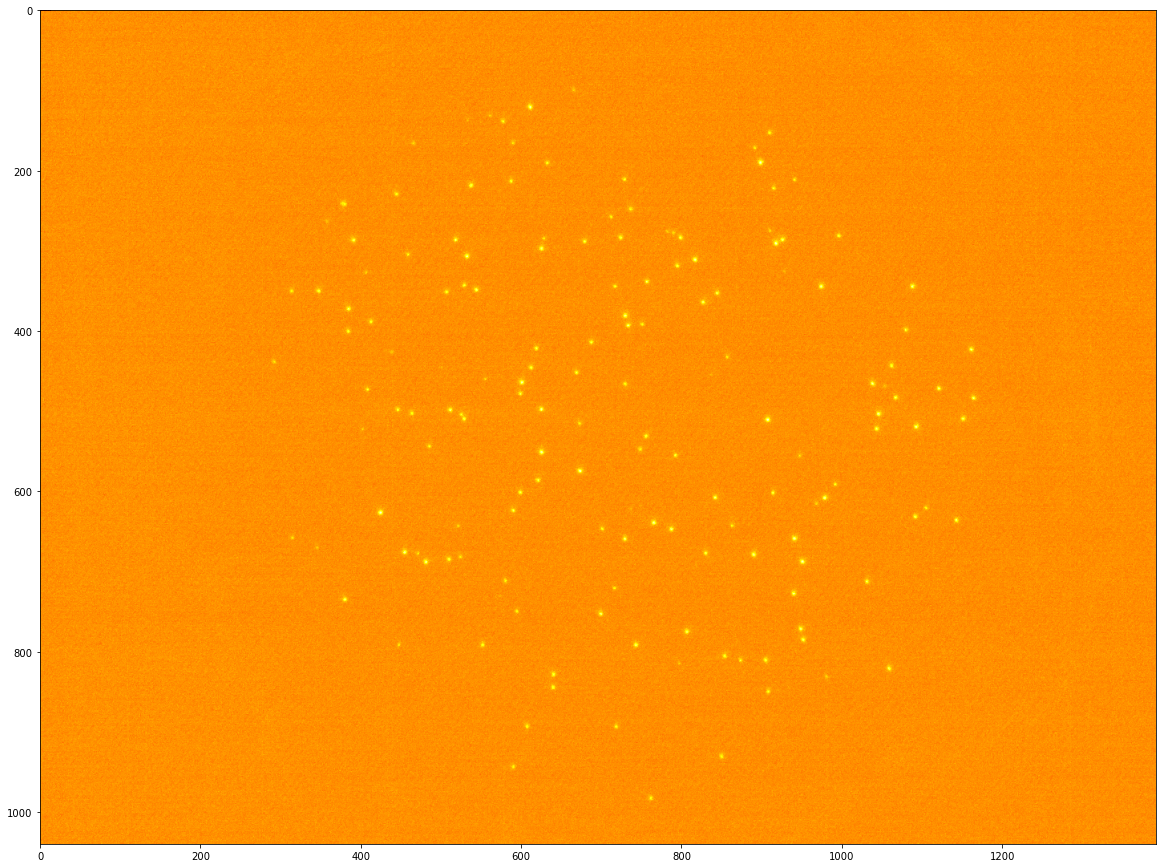

In [162]:
Im = Image.open(fl[1])
arr = np.array(Im)
fig = plt.figure(figsize = (20,20))
plt.imshow(arr, cmap = 'hot')
#plt.savefig('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/Data analysis/Figures/MCP5 images/run_465-nr_1-MCP5-clust_605-thresh_false.png', dpi = 200)